In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('CSE_445_Project_DB.csv')
df.head()


,Team names,PLAYER ID,PLAYER NAME,Key_Player,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,MVP
0,AFGANISTHAN,101,Mohammad Nabi*,NO,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,YES
1,AFGANISTHAN,102,FAREED AHMAD,NO,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,NO
2,AFGANISTHAN,103,NAJIBULLAH ZADRAN*,NO,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,NO
3,AFGANISTHAN,104,QAIS AHMAD,NO,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,NO
4,AFGANISTHAN,105,HAZRAT ZAZAI,YES,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,NO


In [4]:
df.dtypes

Team names           object
PLAYER ID             int64
PLAYER NAME          object
Key_Player           object
MATCHES               int64
TOTAL RUN             int64
BATTING AVG         float64
Strike Rate         float64
Wickets               int64
ECONOMY             float64
IMPACT (batting)    float64
wicket/match        float64
impact bowling      float64
Total impact        float64
Semi-probability    float64
MVP                  object
dtype: object

In [5]:
df.shape


(205, 16)

In [6]:
df.drop(['Team names', 'PLAYER NAME'], axis=1, inplace=True)


In [7]:
df.shape

(205, 14)

In [8]:
df.describe()

,PLAYER ID,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000
mean,207.151220,39.351220,555.717073,19.039659,112.941415,22.131707,5.895122,0.151366,0.60078,0.076000,0.227171,0.183756
std,64.938973,26.790647,738.183740,11.570433,37.371603,27.607849,3.908878,0.108072,0.57259,0.073562,0.091393,0.180666
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,152.000000,20.000000,34.000000,10.000000,100.000000,0.000000,0.000000,0.060000,0.00000,0.000000,0.170000,0.020000
50%,204.000000,34.000000,260.000000,20.350000,120.510000,10.000000,7.290000,0.150000,0.57000,0.070000,0.220000,0.100000
75%,259.000000,53.000000,792.000000,26.500000,136.200000,35.000000,8.200000,0.220000,1.10000,0.140000,0.280000,0.350000
max,326.000000,143.000000,3794.000000,57.380000,225.000000,125.000000,21.000000,0.490000,2.25000,0.270000,0.580000,0.500000


In [9]:
df.duplicated().sum()


0

In [10]:
df.isnull().sum()


PLAYER ID           0
Key_Player          0
MATCHES             0
TOTAL RUN           0
BATTING AVG         0
Strike Rate         0
Wickets             0
ECONOMY             0
IMPACT (batting)    0
wicket/match        0
impact bowling      0
Total impact        0
Semi-probability    0
MVP                 0
dtype: int64

In [11]:
df['Key_Player'].value_counts()


NO     162
YES     43
Name: Key_Player, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(df.Key_Player)
df['Target_key_player'] = label
df.head()


,PLAYER ID,Key_Player,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,MVP,Target_key_player
0,101,NO,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,YES,0
1,102,NO,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,NO,0
2,103,NO,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,NO,0
3,104,NO,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,NO,0
4,105,YES,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,NO,1


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder1 = LabelEncoder()
label1 = label_encoder1.fit_transform(df.MVP)
df['Target_MVP'] = label1
df.head()


,PLAYER ID,Key_Player,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,MVP,Target_key_player,Target_MVP
0,101,NO,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,YES,0,1
1,102,NO,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,NO,0,0
2,103,NO,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,NO,0,0
3,104,NO,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,NO,0,0
4,105,YES,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,NO,1,0


In [14]:
df1 = df.drop(['Key_Player', 'MVP',], axis=1)
df1.head()


,PLAYER ID,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,Target_key_player,Target_MVP
0,101,100,1667,21.9,140.3,84,7.29,0.19,0.84,0.11,0.30,0.02,0,1
1,102,21,27,0.0,112.5,30,8.70,0.00,1.43,0.16,0.16,0.02,0,0
2,103,82,1512,32.2,142.4,1,4.00,0.29,0.01,0.00,0.29,0.02,0,0
3,104,2,8,8.0,88.9,4,7.66,0.04,2.00,0.25,0.30,0.02,0,0
4,105,32,952,32.8,136.4,0,0.00,0.28,0.00,0.00,0.28,0.02,1,0


# Correcting the Imabalance In Dataset by SMOTE.

In [15]:
df1['Target_MVP'].value_counts()


0    164
1     41
Name: Target_MVP, dtype: int64

In [16]:
X = df1.drop(['Target_MVP'], axis=1)
y = df1['Target_MVP']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target_MVP (y) Shape Before Balancing :', y.shape)


Feature (X) Shape Before Balancing : (205, 13)
Target_MVP (y) Shape Before Balancing : (205,)


In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=300)


In [18]:
X, y = sm.fit_resample(X, y)


In [19]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target_MVP (y) Shape After Balancing :', y.shape)


Feature (X) Shape After Balancing : (328, 13)
Target_MVP (y) Shape After Balancing : (328,)


# Splitting the Data

In [20]:
x = df1.drop(columns=['Target_MVP', 'PLAYER ID'])
y = df1['Target_MVP']


In [21]:
x.max()


MATCHES               143.00
TOTAL RUN            3794.00
BATTING AVG            57.38
Strike Rate           225.00
Wickets               125.00
ECONOMY                21.00
IMPACT (batting)        0.49
wicket/match            2.25
impact bowling          0.27
Total impact            0.58
Semi-probability        0.50
Target_key_player       1.00
dtype: float64

In [22]:
x.min()


MATCHES              0.0
TOTAL RUN            0.0
BATTING AVG          0.0
Strike Rate          0.0
Wickets              0.0
ECONOMY              0.0
IMPACT (batting)     0.0
wicket/match         0.0
impact bowling       0.0
Total impact         0.0
Semi-probability     0.0
Target_key_player    0.0
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

# Scalling the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
scaler.scale_


array([9.61538462e-03, 4.45037828e-04, 1.74276751e-02, 6.81059729e-03,
       8.19672131e-03, 1.00000000e-01, 2.04081633e+00, 4.44444444e-01,
       3.70370370e+00, 2.32558140e+00, 2.00000000e+00, 1.00000000e+00])

As all data are in array form. We will use pandas dataframe to convert them into dataframe.


In [25]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_train_scaled.head()


,MATCHES,TOTAL RUN,BATTING AVG,Strike Rate,Wickets,ECONOMY,IMPACT (batting),wicket/match,impact bowling,Total impact,Semi-probability,Target_key_player
0,0.146853,0.007116,0.000000,0.500000,0.240,0.414286,0.000000,0.715,0.615385,0.275862,0.04,0.0
1,0.006993,0.003163,0.227273,0.311111,0.008,0.452381,0.111111,0.500,0.384615,0.258621,0.50,0.0
2,0.314685,0.008434,0.121212,0.309156,0.408,0.346190,0.066667,0.565,0.576923,0.310345,0.04,0.0
3,0.160839,0.020295,0.242992,0.600356,0.208,0.438095,0.244444,0.565,0.461538,0.396552,1.00,0.0
4,0.237762,0.142066,0.509470,0.558222,0.016,0.337143,0.466667,0.030,0.038462,0.379310,0.60,0.0


# 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [27]:
y_pred_lr=reg.predict(x_test_scaled)

F1,Recall,Precision Score for Logistic Regression

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

print('Precision: ', precision_score(y_test, y_pred_lr))
print('Recall: ', recall_score(y_test, y_pred_lr))
print('f1_score: ', f1_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr, labels=(1, 0)))
print("Training Score: ", reg.score(x_train_scaled, y_train)*100)


Precision:  1.0
Recall:  0.5
f1_score:  0.6666666666666666
[[ 5  5]
 [ 0 31]]
Training Score:  93.90243902439023


Plotting Confusion Matrix

In [29]:
import seaborn as sns
sns.set(font_scale=1.5)


def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(
        confusion_matrix(y_true, y_preds, labels=(1, 0)),
        annot=True,
        cbar=False,
        fmt='g'
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')


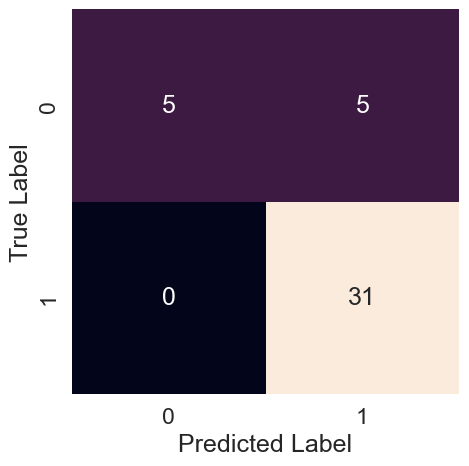

In [30]:
conf_matrix(y_test,y_pred_lr)

Accuracy of Logistic Regression

In [31]:
reg_acc = accuracy_score(y_test, y_pred_lr)*100
reg_acc


87.8048780487805

In [32]:
y_predtrain_lr = reg.predict(x_train_scaled)
reg_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
reg_train_acc


93.90243902439023

In [33]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression'],'Train_Accuracy':[reg_train_acc],'Test_Accuracy':[reg_acc]})
print(tempResults)

results= pd.DataFrame()
print(type(results))

results = pd.concat( [results, tempResults] )

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results

             Algorithm  Train_Accuracy  Test_Accuracy
0  Logistic Regression       93.902439      87.804878
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,Logistic Regression,93.902439,87.804878


AUC Curve

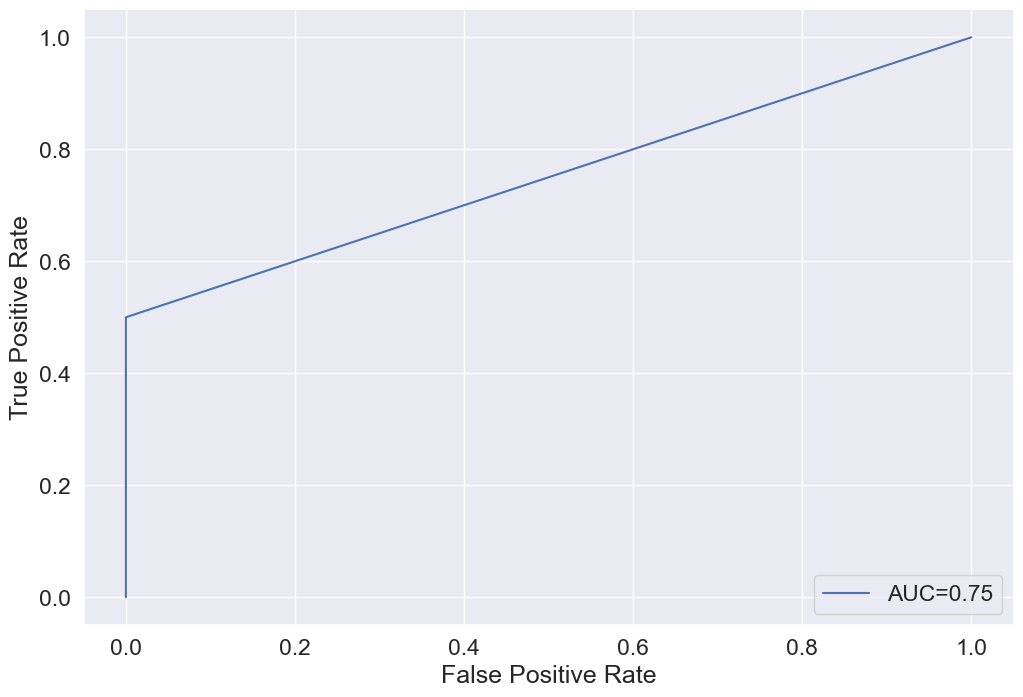

In [34]:
from sklearn import metrics

reg = LogisticRegression()
reg.fit(x_train_scaled,y_train) 
y_pred_lr=reg.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred_lr)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lr)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 2. Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=10)

dtree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [36]:
y_pred_dt=dtree.predict(x_test_scaled)

F1,Recall,Precision Score for Logistic Regression

In [37]:
print('Precision: ',precision_score(y_test, y_pred_dt))
print('Recall: ',recall_score(y_test, y_pred_dt))
print('f1_score: ',f1_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt, labels=(1,0)))
print("Training Score: ",dtree.score(x_train_scaled,y_train)*100)

Precision:  0.5
Recall:  0.4
f1_score:  0.4444444444444445
[[ 4  6]
 [ 4 27]]
Training Score:  98.78048780487805


Confusion Matrix

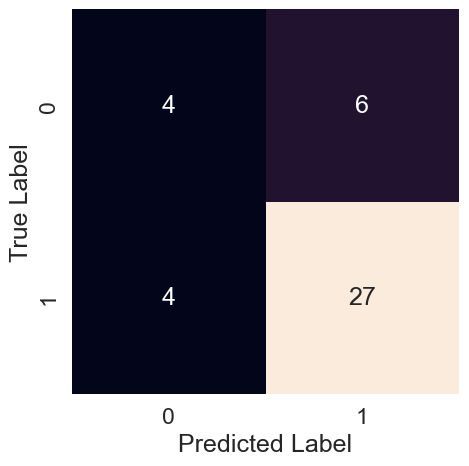

In [38]:
conf_matrix(y_test,y_pred_dt)

Accuracy of Decision tree.

In [39]:
dt_acc= accuracy_score(y_test,y_pred_dt)*100
dt_acc

75.60975609756098

In [40]:
y_predtrain_lr = dtree.predict(x_train_scaled)
dt_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
dt_train_acc

98.78048780487805

In [41]:
tempResults = pd.DataFrame({'Algorithm':['DecisionTreeClassifier'],'Train_Accuracy':[dt_train_acc],'Test_Accuracy':[dt_acc]})
print(tempResults)

results= pd.DataFrame()
print(type(results))

results = pd.concat( [results, tempResults] )

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results

                Algorithm  Train_Accuracy  Test_Accuracy
0  DecisionTreeClassifier       98.780488      75.609756
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,DecisionTreeClassifier,98.780488,75.609756


AUC Curve for Decision Tree

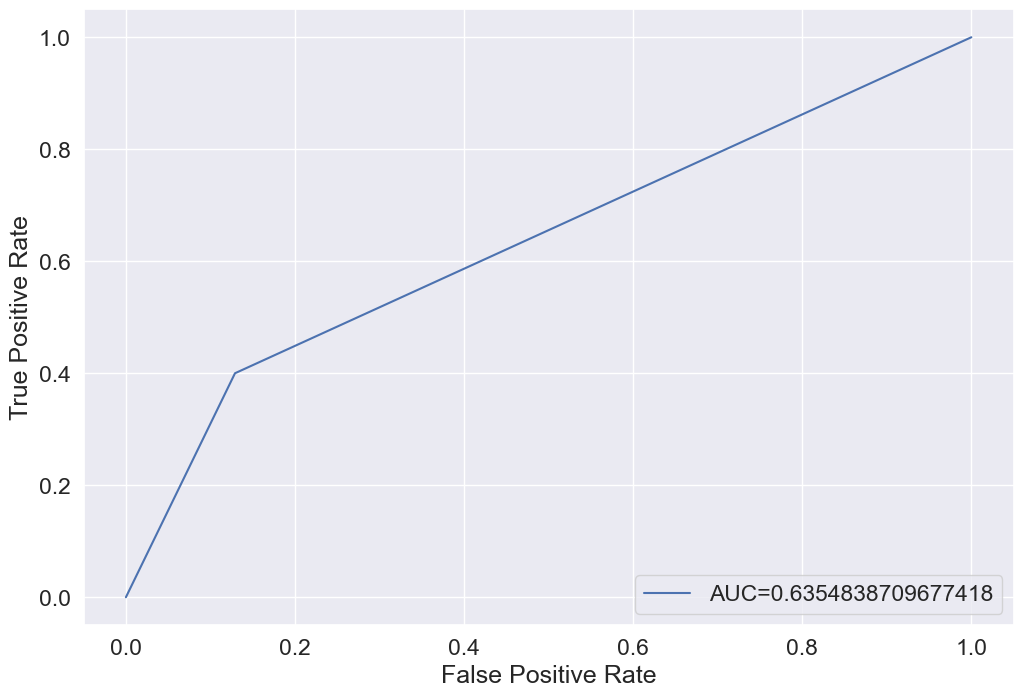

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=10)
dtree.fit(x_train_scaled,y_train)

y_pred_dt=dtree.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred_dt)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dt)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# 3. K-Near-Neighbour Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)


KNeighborsClassifier()

In [44]:
y_pred_knn=knn.predict(x_test_scaled)

F1,Recall,Precision scores

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

print('Precision: ',precision_score(y_test, y_pred_knn))
print('Recall: ',recall_score(y_test, y_pred_knn))
print('f1_score: ',f1_score(y_test,y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn, labels=(1,0)))
print("Training Score: ",knn.score(x_train_scaled, y_train)*100)

Precision:  1.0
Recall:  0.6
f1_score:  0.7499999999999999
[[ 6  4]
 [ 0 31]]
Training Score:  94.51219512195121


Confusion Matrix


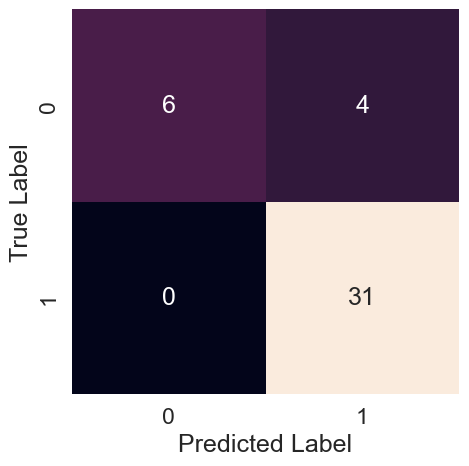

In [46]:
conf_matrix(y_test,y_pred_knn)

# Accuracy of KNN model.

In [47]:
knn_acc = accuracy_score(y_test, y_pred_knn)*100
knn_acc


90.2439024390244

In [48]:
y_predtrain_lr = knn.predict(x_train_scaled)
knn_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
knn_train_acc


94.51219512195121

In [49]:
tempResults = pd.DataFrame({'Algorithm': ['KNeighborsClassifier'], 'Train_Accuracy': [
                           knn_train_acc], 'Test_Accuracy': [knn_acc]})
print(tempResults)

results = pd.DataFrame()
print(type(results))

results = pd.concat([results, tempResults])

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results


              Algorithm  Train_Accuracy  Test_Accuracy
0  KNeighborsClassifier       94.512195      90.243902
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,KNeighborsClassifier,94.512195,90.243902


AUC curve for KNN

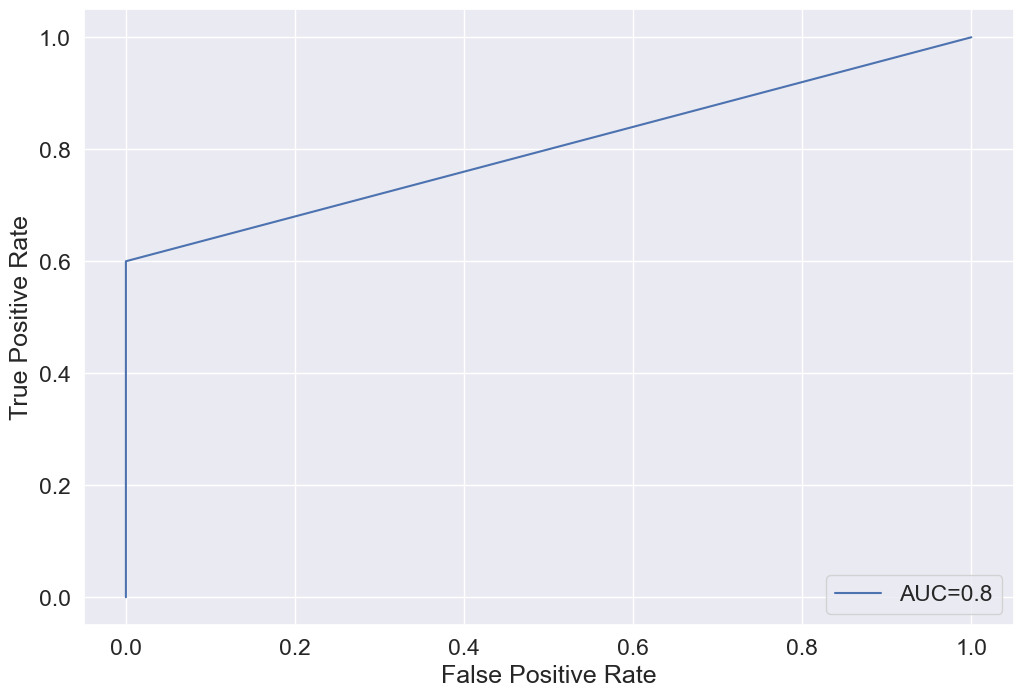

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred_knn)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# 4. RandomForest Classifier.

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6, random_state=10)
rfc.fit(x_train_scaled, y_train)


RandomForestClassifier(max_depth=6, random_state=10)

In [54]:
y_pred_rfc=rfc.predict(x_test_scaled)

F1,Recall,Precision Score

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

print('Precision: ', precision_score(y_test, y_pred_rfc))
print('Recall: ', recall_score(y_test, y_pred_rfc))
print('f1_score: ', f1_score(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc, labels=(1, 0)))
print("Training Score: ", rfc.score(x_train_scaled, y_train)*100)


Precision:  1.0
Recall:  0.2
f1_score:  0.33333333333333337
[[ 2  8]
 [ 0 31]]
Training Score:  100.0


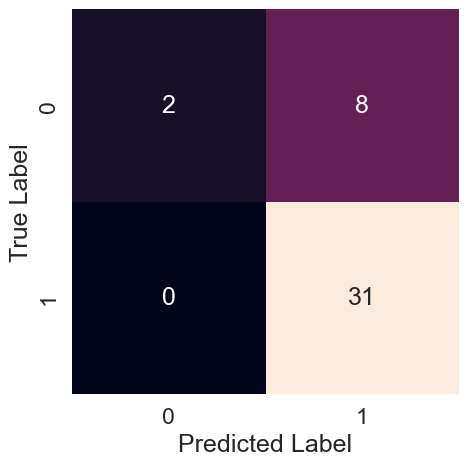

In [56]:
conf_matrix(y_test,y_pred_rfc)

Accuracy of Random Forest model

In [57]:
rfc_acc = accuracy_score(y_test, y_pred_rfc)*100
rfc_acc


80.48780487804879

In [58]:
y_predtrain_lr = rfc.predict(x_train_scaled)
rfc_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
rfc_train_acc


100.0

In [59]:
tempResults = pd.DataFrame({'Algorithm': ['RandomForestClassifier'], 'Train_Accuracy': [
                           rfc_train_acc], 'Test_Accuracy': [rfc_acc]})
print(tempResults)

results = pd.DataFrame()
print(type(results))

results = pd.concat([results, tempResults])

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results


                Algorithm  Train_Accuracy  Test_Accuracy
0  RandomForestClassifier           100.0      80.487805
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,RandomForestClassifier,100.0,80.487805


In [60]:
tempResults = pd.DataFrame(
    {'Algorithm': [' RandomForestClassifier'], 'Test_Accuracy': [rfc_acc]})

results = pd.concat([results, tempResults])

results = results[['Algorithm', 'Test_Accuracy']]
results


,Algorithm,Test_Accuracy
0,RandomForestClassifier,80.487805
0,RandomForestClassifier,80.487805


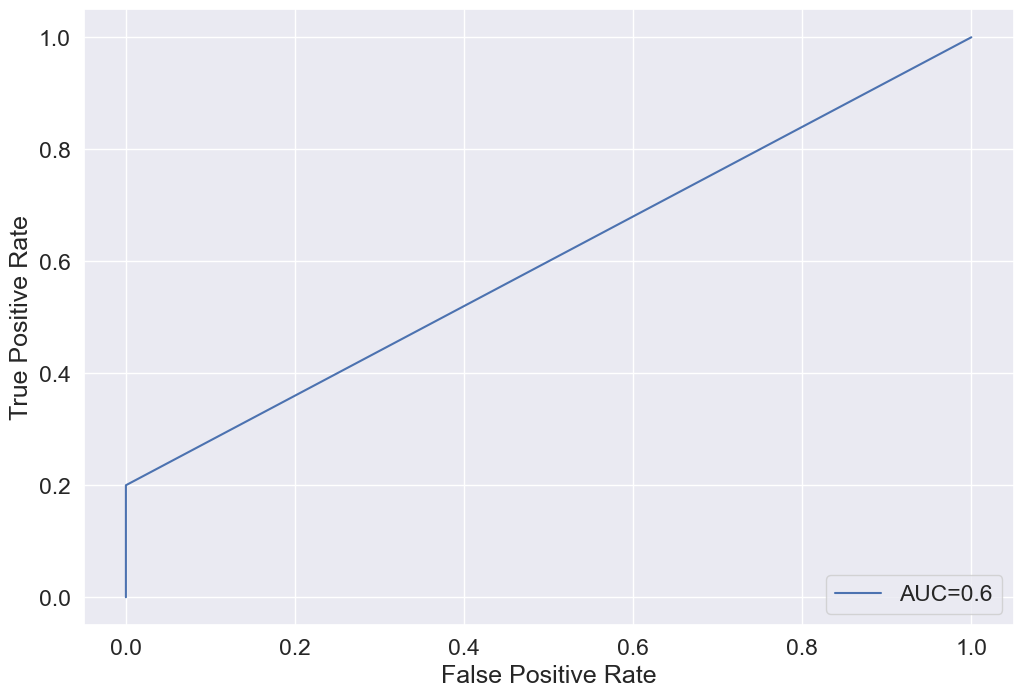

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, random_state=10)
rfc.fit(x_train_scaled, y_train)

y_pred_rfc = rfc.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred_rfc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()



# 5. AdaBoost Classifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train_scaled, y_train)


AdaBoostClassifier()

In [63]:
y_pred_adb=adb.predict(x_test_scaled)

F1,Recall,Precision Score

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

print('Precision: ',precision_score(y_test, y_pred_adb))
print('Recall: ',recall_score(y_test, y_pred_adb))
print('f1_score: ',f1_score(y_test,y_pred_adb))
print(confusion_matrix(y_test, y_pred_adb, labels=(1,0)))
print("Training Score: ",adb.score(x_train_scaled, y_train)*100)

Precision:  0.4
Recall:  0.2
f1_score:  0.26666666666666666
[[ 2  8]
 [ 3 28]]
Training Score:  100.0


Confusion Matrix

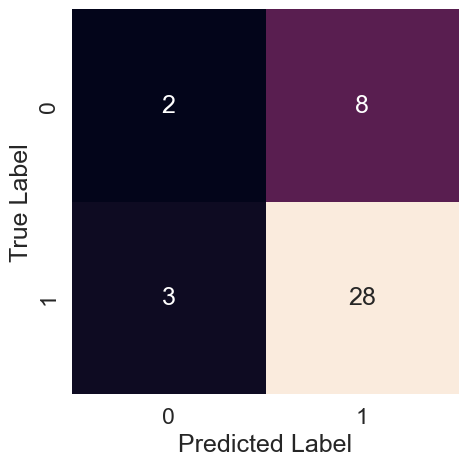

In [65]:
conf_matrix(y_test,y_pred_adb)

# Accuracy of Adaboost Classifier 

In [66]:
adb_acc = accuracy_score(y_test, y_pred_adb)*100
adb_acc


73.17073170731707

In [67]:
y_predtrain_lr = adb.predict(x_train_scaled)
adb_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
adb_train_acc


100.0

In [68]:
tempResults = pd.DataFrame({'Algorithm': ['AdaBoostClassifier'], 'Train_Accuracy': [
                           adb_train_acc], 'Test_Accuracy': [adb_acc]})
print(tempResults)

results = pd.DataFrame()
print(type(results))

results = pd.concat([results, tempResults])

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results


            Algorithm  Train_Accuracy  Test_Accuracy
0  AdaBoostClassifier           100.0      73.170732
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,AdaBoostClassifier,100.0,73.170732


AUC Curve for Adaboost

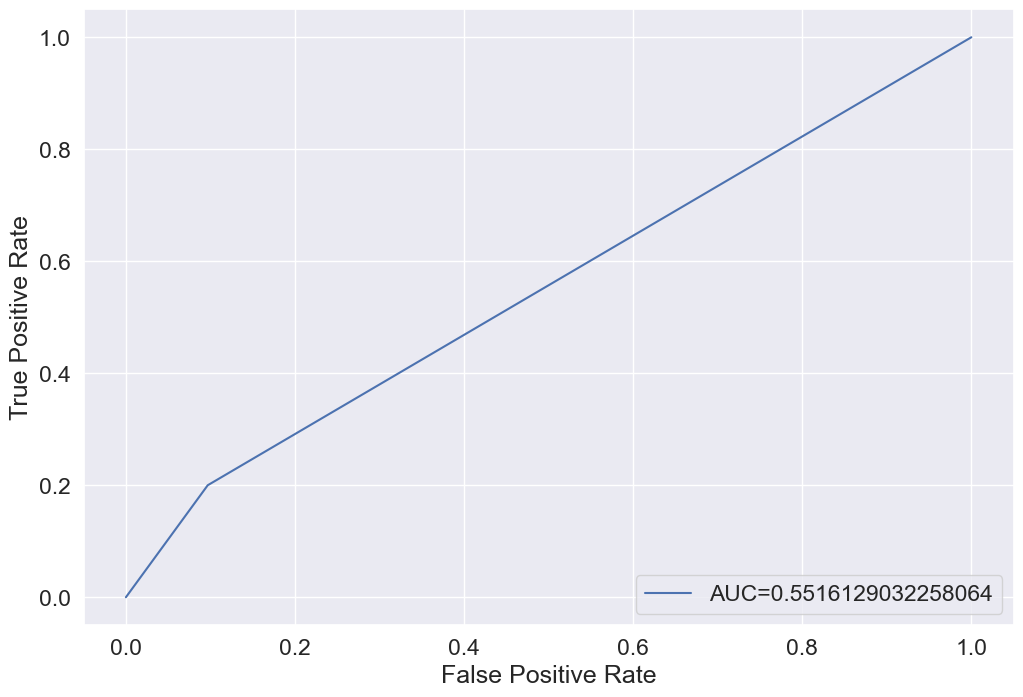

In [69]:
adb = AdaBoostClassifier()
adb.fit(x_train_scaled, y_train)

y_pred_adb = adb.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred_adb)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_adb)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# 6. GradientBoosting Classifier.

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_scaled, y_train)


GradientBoostingClassifier()

In [71]:
y_pred_gbc=gbc.predict(x_test_scaled)

F1,Recall,Precision Score

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

print('Precision: ',precision_score(y_test, y_pred_gbc))
print('Recall: ',recall_score(y_test, y_pred_gbc))
print('f1_score: ',f1_score(y_test,y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc, labels=(1,0)))
print("Training Score: ",gbc.score(x_train_scaled, y_train)*100)

Precision:  0.4
Recall:  0.2
f1_score:  0.26666666666666666
[[ 2  8]
 [ 3 28]]
Training Score:  100.0


Confusion Matrix for Gradient Boosting

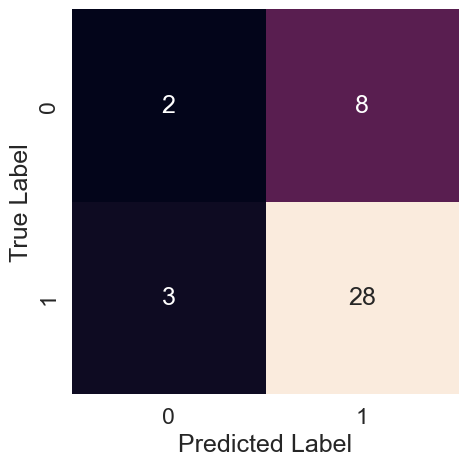

In [73]:
conf_matrix(y_test,y_pred_gbc)

# Accuracy of this model. 

In [74]:
gbc_acc = accuracy_score(y_test, y_pred_gbc)*100
gbc_acc


73.17073170731707

In [75]:
y_predtrain_lr = gbc.predict(x_train_scaled)
gbc_train_acc = accuracy_score(y_train, y_predtrain_lr)*100
gbc_train_acc


100.0

In [77]:
tempResults = pd.DataFrame({'Algorithm': ['GradientBoostingClassifier'], 'Train_Accuracy': [
                           gbc_train_acc], 'Test_Accuracy': [gbc_acc]})
print(tempResults)

results = pd.DataFrame()
print(type(results))

results = pd.concat([results, tempResults])

results = results[['Algorithm', 'Train_Accuracy', 'Test_Accuracy']]
results


                    Algorithm  Train_Accuracy  Test_Accuracy
0  GradientBoostingClassifier           100.0      73.170732
<class 'pandas.core.frame.DataFrame'>


,Algorithm,Train_Accuracy,Test_Accuracy
0,GradientBoostingClassifier,100.0,73.170732


AUC Curve for Gradient Boosting

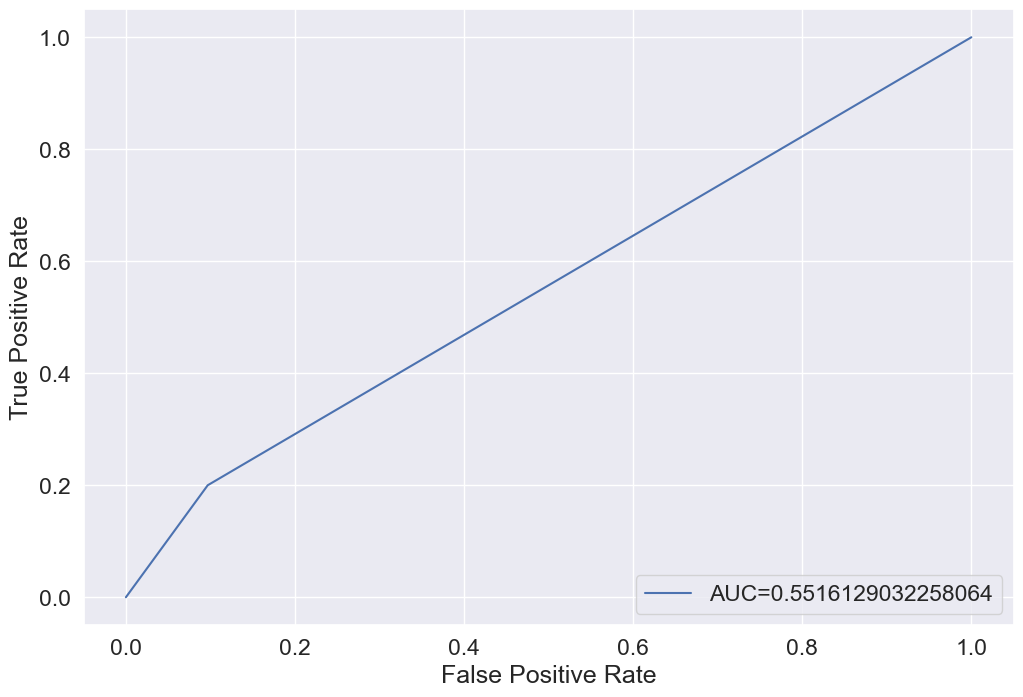

In [76]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_scaled, y_train)

y_pred_gbc = gbc.predict(x_test_scaled)

auc = metrics.roc_auc_score(y_test, y_pred_gbc)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gbc)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
